In [1]:
import pandas as pd
import pickle
import json
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import folium

In [3]:
# Ruta a la carpeta Yelp
yelp_folder = 'Yelp'

# Leer el archivo business.pkl
business_df = pd.read_pickle(os.path.join(yelp_folder, 'business.pkl'))

In [4]:
# Crear un nuevo DataFrame con las primeras 14 columnas
df_business = business_df.iloc[:, :14]

In [5]:
# Se convierte la columna 'city' a tipo str
df_business.loc[:, 'city'] = df_business['city'].astype(str)

In [7]:
city_counts = df_business['city'].value_counts()
# Ordenar city_counts en orden descendente y mostrar los 10 primeros valores
top_25_cities = city_counts.sort_values(ascending=False).head(25)

In [8]:
# mostrar los 10 primeros valores
top_25_cities

city
Philadelphia        14569
Tucson               9250
Tampa                9050
Indianapolis         7540
Nashville            6971
New Orleans          6209
Reno                 5935
Edmonton             5054
Saint Louis          4827
Santa Barbara        3829
Boise                2937
Clearwater           2221
Saint Petersburg     1663
Metairie             1643
Sparks               1624
Wilmington           1446
Franklin             1414
St. Louis            1255
St. Petersburg       1185
Meridian             1043
Brandon              1033
Largo                1002
Carmel                967
Cherry Hill           960
West Chester          838
Name: count, dtype: int64

In [9]:
# Se crea un nuevo DataFrame (df_nj) con los registros donde 'city' sea igual a 'New Jersey'
df_Philadelphia = df_business[df_business['city'] == 'Philadelphia']

In [10]:
df_Philadelphia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14569 entries, 3 to 150336
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   14569 non-null  object
 1   name          14569 non-null  object
 2   address       14569 non-null  object
 3   city          14569 non-null  object
 4   state         14569 non-null  object
 5   postal_code   14569 non-null  object
 6   latitude      14569 non-null  object
 7   longitude     14569 non-null  object
 8   stars         14569 non-null  object
 9   review_count  14569 non-null  object
 10  is_open       14569 non-null  object
 11  attributes    13399 non-null  object
 12  categories    14560 non-null  object
 13  hours         11785 non-null  object
dtypes: object(14)
memory usage: 1.7+ MB


In [11]:
categories_counts = df_Philadelphia['categories'].value_counts()
# Ordenar city_counts en orden descendente y mostrar los 10 primeros valores
top_25_categories = categories_counts.sort_values(ascending=False).head(25)

In [12]:
top_25_categories

categories
Restaurants, Pizza                           154
Pizza, Restaurants                           124
Restaurants, Chinese                          89
Nail Salons, Beauty & Spas                    86
Chinese, Restaurants                          84
Beauty & Spas, Hair Salons                    80
Hair Salons, Beauty & Spas                    79
Beauty & Spas, Nail Salons                    79
Coffee & Tea, Food                            50
Food, Coffee & Tea                            50
Restaurants, Italian                          43
Restaurants, Mexican                          42
Italian, Restaurants                          39
Mexican, Restaurants                          39
Food, Grocery                                 37
Restaurants, American (New)                   36
American (New), Restaurants                   34
Auto Repair, Automotive                       33
Food, Beer, Wine & Spirits                    33
Automotive, Auto Repair                       31
Banks & C

In [14]:
# Crear una copia del DataFrame
df_Philadelphia_copy = df_Philadelphia.copy()

# Rellenar los valores NaN en la columna 'categories' con una cadena vacía ''
df_Philadelphia_copy['categories'].fillna('', inplace=True)

# Filtrar solo las filas que contienen 'Restaurants' o 'Food' en la columna 'categories'
df_Philadelphia_copy = df_Philadelphia_copy[df_Philadelphia['categories'].str.contains('Restaurants|Food')]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [15]:
df_Philadelphia_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14569 entries, 3 to 150336
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   14569 non-null  object
 1   name          14569 non-null  object
 2   address       14569 non-null  object
 3   city          14569 non-null  object
 4   state         14569 non-null  object
 5   postal_code   14569 non-null  object
 6   latitude      14569 non-null  object
 7   longitude     14569 non-null  object
 8   stars         14569 non-null  object
 9   review_count  14569 non-null  object
 10  is_open       14569 non-null  object
 11  attributes    13399 non-null  object
 12  categories    14569 non-null  object
 13  hours         11785 non-null  object
dtypes: object(14)
memory usage: 1.7+ MB


In [16]:
# Crear una función para obtener las claves con valor 'True' de un diccionario
def get_true_attributes(attributes):
    true_attributes = []
    if isinstance(attributes, dict):
        for key, value in attributes.items():
            if value == 'True':
                true_attributes.append(key)
    return true_attributes

# Aplicar la función y crear la nueva columna 'attributes_cloud'
df_Philadelphia_copy['attributes_cloud'] = df_Philadelphia_copy['attributes'].apply(get_true_attributes)

# Convertir la lista de claves en una cadena
df_Philadelphia_copy['attributes_cloud'] = df_Philadelphia_copy['attributes_cloud'].apply(lambda x: ', '.join(x) if x else '')

In [17]:
# Concatenar todas las cadenas de 'attributes_cloud' en una sola
attributes_text = ' '.join(df_Philadelphia_copy['attributes_cloud'])

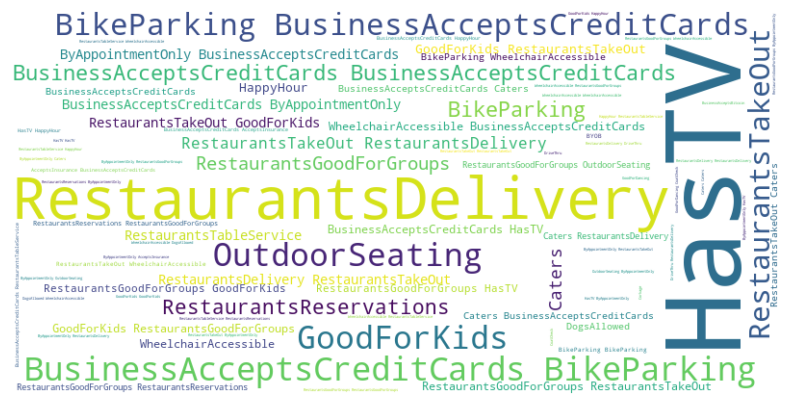

In [18]:
# Crear la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(attributes_text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
Phil_star_counts = df_Philadelphia['stars'].value_counts()

# Ordenar Phil_star_counts en orden descendente y mostrar los 10 primeros valores
top_12_Phil_star_counts = Phil_star_counts.sort_values(ascending=False).head(12)

In [20]:
top_12_Phil_star_counts

stars
4.0    3173
4.5    2785
3.5    2544
3.0    1767
5.0    1512
2.5    1268
2.0     892
1.5     425
1.0     203
Name: count, dtype: int64

In [21]:
# Crear un nuevo DataFrame con los registros donde 'stars' es igual a 1.0
df_stars_1 = df_Philadelphia[df_Philadelphia['stars'] == 1.0].copy()



In [22]:
df_stars_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 288 to 150104
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   business_id   203 non-null    object
 1   name          203 non-null    object
 2   address       203 non-null    object
 3   city          203 non-null    object
 4   state         203 non-null    object
 5   postal_code   203 non-null    object
 6   latitude      203 non-null    object
 7   longitude     203 non-null    object
 8   stars         203 non-null    object
 9   review_count  203 non-null    object
 10  is_open       203 non-null    object
 11  attributes    119 non-null    object
 12  categories    200 non-null    object
 13  hours         116 non-null    object
dtypes: object(14)
memory usage: 23.8+ KB


In [23]:
# Aplicar la función y crear la nueva columna 'attributes_cloud'
df_stars_1['attributes_cloud'] = df_stars_1['attributes'].apply(get_true_attributes)

# Convertir la lista de claves en una cadena
df_stars_1['attributes_cloud'] = df_stars_1['attributes_cloud'].apply(lambda x: ', '.join(x) if x else '')

In [24]:
# Concatenar todas las cadenas de 'attributes_cloud' en una sola
attributes_text_star_1 = ' '.join(df_stars_1['attributes_cloud'])

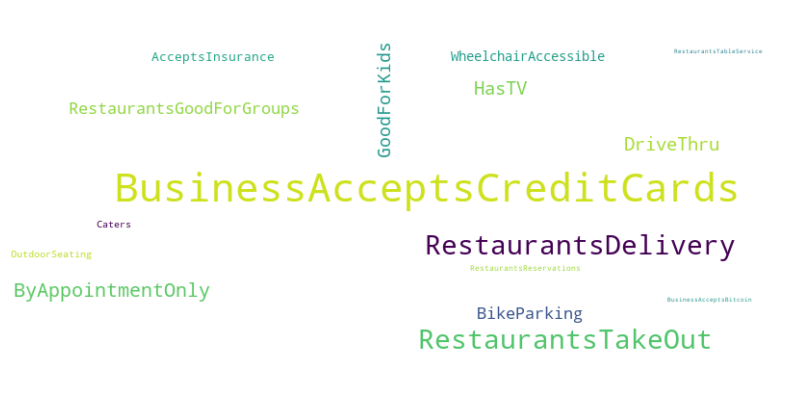

In [25]:
# Crear la WordCloud
wordcloud_star_1 = WordCloud(width=800, height=400, background_color='white').generate(attributes_text_star_1)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_star_1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# Crear un mapa centrado en las coordenadas promedio
mean_latitude = df_stars_1['latitude'].astype(float).mean()
mean_longitude = df_stars_1['longitude'].astype(float).mean()
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=14)

# Iterar a través de los registros en df_stars_1 y agregar marcadores al mapa
for index, row in df_stars_1.iterrows():
    business_name = row['name']
    latitude = float(row['latitude'])
    longitude = float(row['longitude'])
    folium.Marker([latitude, longitude], tooltip=business_name).add_to(m)

# Mostrar el mapa interactivo
m.save('stars_1_map.html')


In [29]:
from IPython.display import IFrame

# Ruta al archivo HTML del mapa
map_html = 'stars_1_map.html'

# Crear y mostrar el mapa usando IFrame
map_iframe = IFrame(src=map_html, width=800, height=600)
display(map_iframe)
